In [3]:
# Import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [214]:
# import the data

# data on batting
batting = pd.read_csv("C:\\Users\\boydd\\Downloads\\Batting\\Batting.csv")
fielding = pd.read_csv("C:\\Users\\boydd\\Downloads\\Fielding.csv\\Fielding.csv")
salaries = pd.read_csv("C:\\Users\\boydd\\Downloads\\Salaries.csv")
pitching = pd.read_csv("C:\\Users\\boydd\\Downloads\\Pitching.csv")

In [223]:
# Will want data for the pitchers to be separate
batting.head()

# Data is starting from 1871, probably want data starting in 2001
batting2 = batting.query('yearID >= 2010')
batting2 = batting2.query('AB >= 20')

In [224]:
bat_quartiles = s.quantiles(batting2['AB'], n=4)
print(bat_quartiles)

[61.0, 175.0, 388.5]


In [225]:
pitching = pitching.query('yearID > 2010')
fielding = fielding.query('yearID > 2010')
salaries = salaries.query('yearID > 2010')

In [226]:
fielding.head()

,playerID,yearID,stint,teamID,lgID,POS,G,GS,InnOuts,PO,A,E,DP,PB,WP,SB,CS,ZR
158196,abadfe01,2011,1,HOU,NL,P,29,NaN,60.0,1.0,2.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN
158197,abreubo01,2011,1,LAA,AL,LF,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158198,abreubo01,2011,1,LAA,AL,OF,28,NaN,675.0,29.0,2.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN
158199,abreubo01,2011,1,LAA,AL,RF,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158200,abreuju01,2011,1,HOU,NL,P,7,NaN,21.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [228]:
batters = pd.merge(batting2, salaries, on=['playerID', 'yearID'])

In [229]:
batters.head()

,playerID,yearID,stint,teamID_x,lgID_x,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,teamID_y,lgID_y,salary
0,abreubo01,2011,1,LAA,AL,142,502.0,54.0,127.0,30.0,1.0,8.0,60.0,21.0,5.0,78.0,113.0,5.0,1.0,1.0,3.0,8.0,LAA,AL,9000000
1,almoner01,2011,1,MIL,NL,16,29.0,1.0,3.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0,MIL,NL,414000
2,alvarpe01,2011,1,PIT,NL,74,235.0,18.0,45.0,9.0,1.0,4.0,19.0,1.0,0.0,24.0,80.0,1.0,2.0,1.0,0.0,11.0,PIT,NL,2050000
3,andinro01,2011,1,BAL,AL,139,457.0,63.0,120.0,22.0,0.0,5.0,36.0,13.0,3.0,41.0,83.0,0.0,3.0,9.0,1.0,14.0,BAL,AL,421500
4,andruel01,2011,1,TEX,AL,150,587.0,96.0,164.0,27.0,3.0,5.0,60.0,37.0,12.0,56.0,74.0,0.0,5.0,16.0,1.0,17.0,TEX,AL,452180


In [230]:
pd.options.display.max_columns = 50

#### Notes on the Columns

playerID = player ID code
awardID = Name of award
lgID = League
CS = Caught Stealing
IBB = Intentional Walks
HBP = Hit by pitch
SH = Sacrifices
SF = Sac Flies
GIDP = Grounded Into Double Play
GILF = Games in LF


For Pitchers
CG = Complete Games
SHO = Shutout
SV = Saves
IPOuts = Outs Pitched
H = Hits
ER = Earned Runs
BAOpp = Opponents' Batting avg
ERA = Earned Run Avg
WP = Wild Pitches
BK = Balk
BFP = Batters Faced by Pitcher
GF = Games Finished
R = Runs allowed


If player never started, GS will be NaN, will fill this with 0.


In [231]:
batters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2597 entries, 0 to 2596
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   playerID  2597 non-null   object 
 1   yearID    2597 non-null   int64  
 2   stint     2597 non-null   int64  
 3   teamID_x  2597 non-null   object 
 4   lgID_x    2597 non-null   object 
 5   G         2597 non-null   int64  
 6   AB        2597 non-null   float64
 7   R         2597 non-null   float64
 8   H         2597 non-null   float64
 9   2B        2597 non-null   float64
 10  3B        2597 non-null   float64
 11  HR        2597 non-null   float64
 12  RBI       2597 non-null   float64
 13  SB        2597 non-null   float64
 14  CS        2597 non-null   float64
 15  BB        2597 non-null   float64
 16  SO        2597 non-null   float64
 17  IBB       2597 non-null   float64
 18  HBP       2597 non-null   float64
 19  SH        2597 non-null   float64
 20  SF        2597 non-null   floa

In [232]:
batters.isnull().sum()

playerID    0
yearID      0
stint       0
teamID_x    0
lgID_x      0
G           0
AB          0
R           0
H           0
2B          0
3B          0
HR          0
RBI         0
SB          0
CS          0
BB          0
SO          0
IBB         0
HBP         0
SH          0
SF          0
GIDP        0
teamID_y    0
lgID_y      0
salary      0
dtype: int64

In [233]:
batters.head()

,playerID,yearID,stint,teamID_x,lgID_x,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,teamID_y,lgID_y,salary
0,abreubo01,2011,1,LAA,AL,142,502.0,54.0,127.0,30.0,1.0,8.0,60.0,21.0,5.0,78.0,113.0,5.0,1.0,1.0,3.0,8.0,LAA,AL,9000000
1,almoner01,2011,1,MIL,NL,16,29.0,1.0,3.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0,MIL,NL,414000
2,alvarpe01,2011,1,PIT,NL,74,235.0,18.0,45.0,9.0,1.0,4.0,19.0,1.0,0.0,24.0,80.0,1.0,2.0,1.0,0.0,11.0,PIT,NL,2050000
3,andinro01,2011,1,BAL,AL,139,457.0,63.0,120.0,22.0,0.0,5.0,36.0,13.0,3.0,41.0,83.0,0.0,3.0,9.0,1.0,14.0,BAL,AL,421500
4,andruel01,2011,1,TEX,AL,150,587.0,96.0,164.0,27.0,3.0,5.0,60.0,37.0,12.0,56.0,74.0,0.0,5.0,16.0,1.0,17.0,TEX,AL,452180


In [234]:
batters = batters.drop(['teamID_y', 'lgID_y'], axis=1)

In [235]:
batters.head()

,playerID,yearID,stint,teamID_x,lgID_x,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,salary
0,abreubo01,2011,1,LAA,AL,142,502.0,54.0,127.0,30.0,1.0,8.0,60.0,21.0,5.0,78.0,113.0,5.0,1.0,1.0,3.0,8.0,9000000
1,almoner01,2011,1,MIL,NL,16,29.0,1.0,3.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0,414000
2,alvarpe01,2011,1,PIT,NL,74,235.0,18.0,45.0,9.0,1.0,4.0,19.0,1.0,0.0,24.0,80.0,1.0,2.0,1.0,0.0,11.0,2050000
3,andinro01,2011,1,BAL,AL,139,457.0,63.0,120.0,22.0,0.0,5.0,36.0,13.0,3.0,41.0,83.0,0.0,3.0,9.0,1.0,14.0,421500
4,andruel01,2011,1,TEX,AL,150,587.0,96.0,164.0,27.0,3.0,5.0,60.0,37.0,12.0,56.0,74.0,0.0,5.0,16.0,1.0,17.0,452180


In [240]:
# Save all categorical variables in one place
cat = batters.select_dtypes(include='O').keys()
cat

Index(['playerID', 'teamID_x', 'lgID_x'], dtype='object')

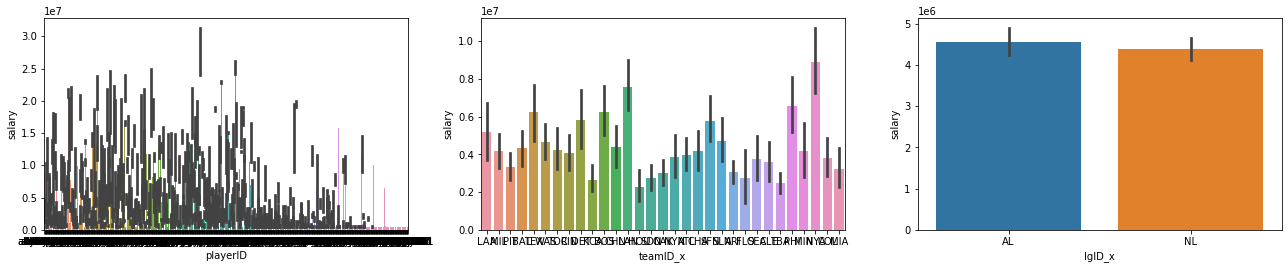

In [241]:
# Get bar plots of all of the categorical variables vs salary
plt.figure(figsize= (30,60))
for i,col in enumerate(cat):
    plt.subplot(13,4,i+1)
    sns.barplot(x=col, y="salary", data=batters)

<AxesSubplot:xlabel='G', ylabel='salary'>

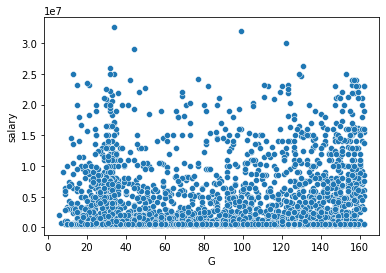

In [242]:
# Plot the numerical variables too
sns.scatterplot(data=batters, x="G", y="salary")

<AxesSubplot:xlabel='R', ylabel='salary'>

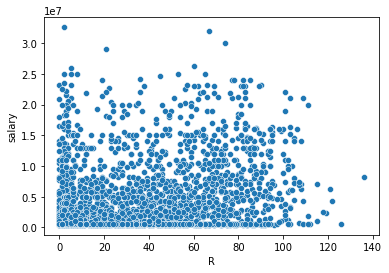

In [244]:
sns.scatterplot(data=batters, x="R", y="salary")

<AxesSubplot:xlabel='H', ylabel='salary'>

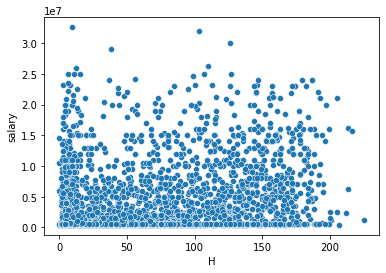

In [247]:
sns.scatterplot(data=batters, x='H', y='salary')

<AxesSubplot:xlabel='HR', ylabel='salary'>

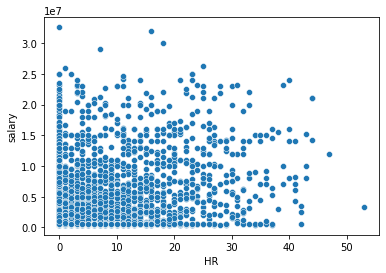

In [249]:
sns.scatterplot(data=batters, x='HR', y='salary')

### Summary Stats

In [250]:
max(batters['salary'])

32571000

In [251]:
min(batters['salary'])

414000

In [81]:
# Do salary prediction without the fielding statistics
batting.head(11)

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
80632,abadan01,2001,1,OAK,AL,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80633,abbotje01,2001,1,FLO,NL,28,42.0,5.0,11.0,3.0,0.0,0.0,5.0,0.0,0.0,3.0,7.0,0.0,1.0,0.0,0.0,1.0
80634,abbotku01,2001,1,ATL,NL,6,9.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
80635,abbotpa01,2001,1,SEA,AL,28,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
80636,abernbr01,2001,1,TBA,AL,79,304.0,43.0,82.0,17.0,1.0,5.0,33.0,8.0,3.0,27.0,35.0,1.0,0.0,3.0,1.0,3.0
80637,abreubo01,2001,1,PHI,NL,162,588.0,118.0,170.0,48.0,4.0,31.0,110.0,36.0,14.0,106.0,137.0,11.0,1.0,0.0,9.0,13.0
80638,acevejo01,2001,1,CIN,NL,18,34.0,1.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,18.0,0.0,0.0,2.0,0.0,0.0
80639,aceveju01,2001,1,COL,NL,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80640,aceveju01,2001,2,FLO,NL,20,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
80641,adamste01,2001,1,LAN,NL,43,39.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,19.0,0.0,0.0,5.0,1.0,0.0


In [252]:
batting2 = batting.drop(['stint'], axis=1)

In [258]:
batting2 = batting2.query('yearID > 2010')
batting2 = batting2.query('AB >= 40')

In [255]:
salaries2 = salaries.drop(['lgID'], axis=1)

In [259]:
batting2.head()

,playerID,yearID,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
94206,abreubo01,2011,LAA,AL,142,502.0,54.0,127.0,30.0,1.0,8.0,60.0,21.0,5.0,78.0,113.0,5.0,1.0,1.0,3.0,8.0
94210,ackledu01,2011,SEA,AL,90,333.0,39.0,91.0,16.0,7.0,6.0,36.0,6.0,0.0,40.0,79.0,1.0,0.0,0.0,3.0,3.0
94214,adamsry01,2011,BAL,AL,29,89.0,9.0,25.0,4.0,0.0,0.0,7.0,0.0,0.0,6.0,25.0,0.0,1.0,0.0,0.0,7.0
94219,alfonel01,2011,COL,NL,25,75.0,2.0,20.0,1.0,0.0,1.0,9.0,0.0,0.0,3.0,13.0,0.0,1.0,0.0,0.0,1.0
94221,allenbr01,2011,OAK,AL,41,146.0,18.0,30.0,9.0,2.0,3.0,11.0,2.0,0.0,11.0,55.0,1.0,0.0,0.0,1.0,0.0


In [260]:
batting2 = pd.merge(batting2, salaries2, on=['playerID', 'teamID', 'yearID'])

In [261]:
batting2.head(11)

,playerID,yearID,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,salary
0,abreubo01,2011,LAA,AL,142,502.0,54.0,127.0,30.0,1.0,8.0,60.0,21.0,5.0,78.0,113.0,5.0,1.0,1.0,3.0,8.0,9000000
1,alvarpe01,2011,PIT,NL,74,235.0,18.0,45.0,9.0,1.0,4.0,19.0,1.0,0.0,24.0,80.0,1.0,2.0,1.0,0.0,11.0,2050000
2,andinro01,2011,BAL,AL,139,457.0,63.0,120.0,22.0,0.0,5.0,36.0,13.0,3.0,41.0,83.0,0.0,3.0,9.0,1.0,14.0,421500
3,andruel01,2011,TEX,AL,150,587.0,96.0,164.0,27.0,3.0,5.0,60.0,37.0,12.0,56.0,74.0,0.0,5.0,16.0,1.0,17.0,452180
4,ankieri01,2011,WAS,NL,122,380.0,46.0,91.0,20.0,0.0,9.0,37.0,10.0,3.0,29.0,96.0,1.0,2.0,3.0,1.0,7.0,1500000
5,arencjp01,2011,TOR,AL,129,443.0,47.0,97.0,20.0,4.0,23.0,78.0,1.0,1.0,36.0,133.0,3.0,4.0,0.0,3.0,6.0,417400
6,arroybr01,2011,CIN,NL,36,57.0,1.0,6.0,2.0,0.0,0.0,2.0,0.0,0.0,1.0,27.0,0.0,0.0,8.0,0.0,0.0,7666666
7,avilaal01,2011,DET,AL,141,464.0,63.0,137.0,33.0,4.0,19.0,82.0,3.0,1.0,73.0,131.0,9.0,3.0,3.0,8.0,8.0,425000
8,avilemi01,2011,KCA,AL,53,185.0,14.0,41.0,11.0,3.0,5.0,31.0,10.0,2.0,9.0,27.0,0.0,2.0,3.0,3.0,5.0,640000
9,aybarer01,2011,LAA,AL,143,556.0,71.0,155.0,33.0,8.0,10.0,59.0,30.0,6.0,31.0,68.0,1.0,6.0,9.0,3.0,13.0,3000000


In [262]:
batting2_dum = pd.get_dummies(batting2, columns=['lgID'])

In [263]:
batting2_dum.head()

,playerID,yearID,teamID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,salary,lgID_AL,lgID_NL
0,abreubo01,2011,LAA,142,502.0,54.0,127.0,30.0,1.0,8.0,60.0,21.0,5.0,78.0,113.0,5.0,1.0,1.0,3.0,8.0,9000000,1,0
1,alvarpe01,2011,PIT,74,235.0,18.0,45.0,9.0,1.0,4.0,19.0,1.0,0.0,24.0,80.0,1.0,2.0,1.0,0.0,11.0,2050000,0,1
2,andinro01,2011,BAL,139,457.0,63.0,120.0,22.0,0.0,5.0,36.0,13.0,3.0,41.0,83.0,0.0,3.0,9.0,1.0,14.0,421500,1,0
3,andruel01,2011,TEX,150,587.0,96.0,164.0,27.0,3.0,5.0,60.0,37.0,12.0,56.0,74.0,0.0,5.0,16.0,1.0,17.0,452180,1,0
4,ankieri01,2011,WAS,122,380.0,46.0,91.0,20.0,0.0,9.0,37.0,10.0,3.0,29.0,96.0,1.0,2.0,3.0,1.0,7.0,1500000,0,1


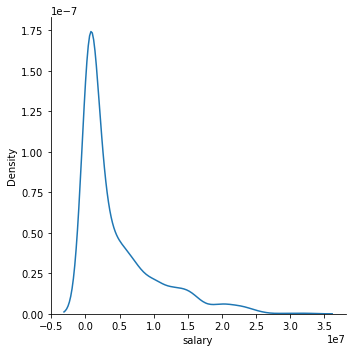

In [264]:
sns.displot(batting2_dum['salary'], kind='kde')

In [265]:
y_sqrt = np.sqrt(batting2_dum['salary'])
y_log = np.log(batting2_dum['salary'])

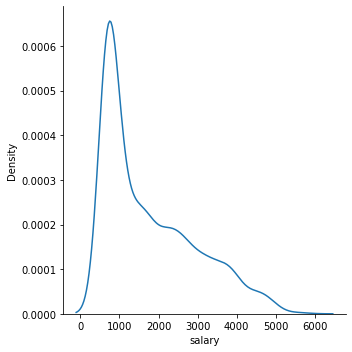

In [266]:
sns.displot(y_sqrt, kind='kde')

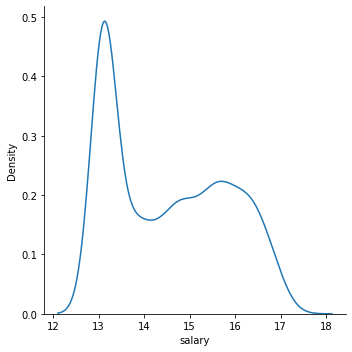

In [267]:
sns.displot(y_log, kind='kde')

In [269]:
from sklearn.preprocessing import StandardScaler

In [270]:
# Add OBP, AVG, 
batting2_dum['avg'] = batting2_dum['H']/batting2_dum['AB']
batting2_dum['OBP'] = (batting2_dum['H'] + batting2_dum['BB'] + batting2_dum['HBP']) / batting2_dum['AB']

In [271]:
batting2_dum['SLG'] = (batting2_dum['H'] - batting2_dum['2B'] - batting2_dum['3B'] - batting2_dum['HR'] + 2*batting2_dum['2B'] + 3*batting2_dum['3B'] + 4*batting2_dum['HR'])/batting2_dum['AB']

In [272]:
batting2_dum.head()

,playerID,yearID,teamID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,salary,lgID_AL,lgID_NL,avg,OBP,SLG
0,abreubo01,2011,LAA,142,502.0,54.0,127.0,30.0,1.0,8.0,60.0,21.0,5.0,78.0,113.0,5.0,1.0,1.0,3.0,8.0,9000000,1,0,0.252988,0.410359,0.364542
1,alvarpe01,2011,PIT,74,235.0,18.0,45.0,9.0,1.0,4.0,19.0,1.0,0.0,24.0,80.0,1.0,2.0,1.0,0.0,11.0,2050000,0,1,0.191489,0.302128,0.289362
2,andinro01,2011,BAL,139,457.0,63.0,120.0,22.0,0.0,5.0,36.0,13.0,3.0,41.0,83.0,0.0,3.0,9.0,1.0,14.0,421500,1,0,0.262582,0.358862,0.343545
3,andruel01,2011,TEX,150,587.0,96.0,164.0,27.0,3.0,5.0,60.0,37.0,12.0,56.0,74.0,0.0,5.0,16.0,1.0,17.0,452180,1,0,0.279387,0.383305,0.361158
4,ankieri01,2011,WAS,122,380.0,46.0,91.0,20.0,0.0,9.0,37.0,10.0,3.0,29.0,96.0,1.0,2.0,3.0,1.0,7.0,1500000,0,1,0.239474,0.321053,0.363158


<AxesSubplot:xlabel='teamID', ylabel='salary'>

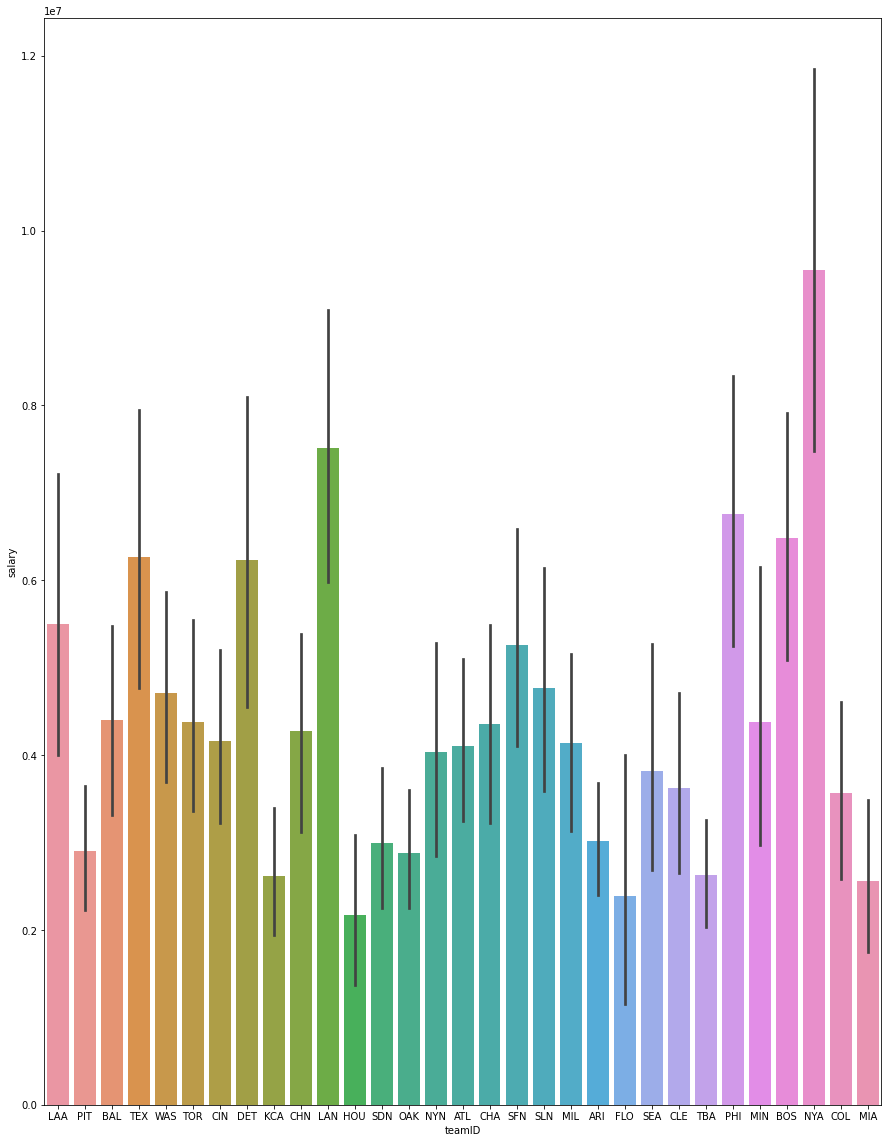

In [273]:
# lets see how the salary is affected by league and team
plt.figure(figsize=(15,20))
sns.barplot(x="teamID", y="salary", data=batting2_dum, estimator=np.mean)

Some teams have much higher salaries than others:
- NYA, BOS, LAA, LAN, PHI all seem to be very high
- FLO, PIT, MON, TBA, OAK, KCA are all very low

Could try grouping teams into high, low, or medium budgets to improve accuracy

<AxesSubplot:xlabel='lgID', ylabel='salary'>

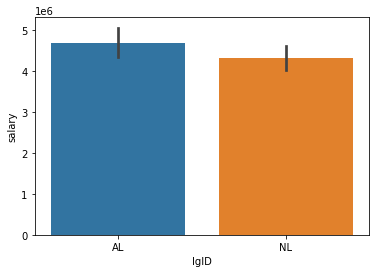

In [274]:
sns.barplot(x="lgID", y="salary", data=batting2)

AL seems to have the higher salaries than NL

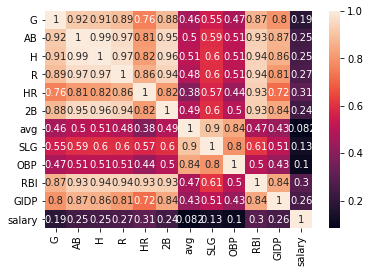

In [160]:
sns.heatmap(batting2_dum[['G', 'AB', 'H', 'R', 'HR', '2B', 'avg', 'SLG', 'OBP', 'RBI', 'GIDP', 'salary']].corr(), annot=True)
plt.show()

Highest Correlations with Salary: RBI, HR, R, GIDP, AB, H, G, 2B

In [42]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression

In [51]:
from sklearn.cluster import KMeans

In [52]:
# Gap statistic for k means
def optimalK(data, nrefs=3, maxClusters=20):
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap': []})
    for gap_index, k in enumerate(range(1, maxClusters)):
        refDisps = np.zeros(nrefs)
        for i in range(nrefs):
            randomReference = np.random.random_sample(size=data.shape)
            km = KMeans(k)
            km.fit(randomReference)
            refDisp = km.inertia_
            refDisps[i] = refDisp
        km = KMeans(k)
        km.fit(data)
        origDisp = km.inertia_
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
        gaps[gap_index] = gap
        resultsdf = resultsdf.append({'clusterCount': k, 'gap':gap}, ignore_index=True)
    return (gaps.argmax() + 1, resultsdf)

In [55]:
from sklearn.metrics import davies_bouldin_score
def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center)
# Then fit the model to your data using the fit method
    model = kmeans.fit_predict(data)
    
    # Calculate Davies Bouldin score
    score = davies_bouldin_score(data, model)
    
    return score

In [275]:
# Look at the distribution of spending by teams
# Group by team, get average salary
# Then get the quantiles of that
grouped_bat3 = batting2.groupby(['teamID']).agg(sal = ('salary', 'mean'))

In [276]:
import statistics as s

In [277]:
quartiles = s.quantiles(grouped_bat3['sal'], n=4)

In [278]:
# Maybe try plotting the quantiles on the same plot as the bars
# Then i can split into groups based on the quantiles
# determine what quartile each team is in, and group that way.
print(quartiles)
# can try with a simple if statement
grouped_bat3 = pd.DataFrame(grouped_bat3)

[2994227.380952381, 4161309.698795181, 5253705.280487805]


In [279]:
first_qt = quartiles[0]
second_qt = quartiles[1]
third_qt = quartiles[2]

In [280]:
grouped_bat3.head()

,sal
teamID,
ARI,3.021936e+06
ATL,4.102781e+06
BAL,4.401028e+06
BOS,6.480631e+06
CHA,4.356644e+06


In [281]:
conditions = [
    (grouped_bat3['sal'] < first_qt),
    (grouped_bat3['sal'] >= first_qt) & (grouped_bat3['sal'] < second_qt),
    (grouped_bat3['sal'] >= second_qt) & (grouped_bat3['sal'] < third_qt),
    (grouped_bat3['sal'] >= third_qt)
]

values = [1, 2, 3, 4]

grouped_bat3['tm_group'] = np.select(conditions, values)

In [282]:
# merge this with batting2 on teamID, drop sal
grouped_bat3 = grouped_bat3.drop(['sal'], axis=1)

In [283]:
batting2 = pd.merge(batting2, grouped_bat3, on=['teamID'])

In [290]:
batting2['AVG'] = batting2['H']/batting2['AB']
batting2['OBP'] = (batting2['H'] + batting2['BB'] + batting2['HBP']) / batting2['AB']
batting2['SLG'] = (batting2['H'] - batting2['2B'] - batting2['3B'] - batting2['HR'] + 2*batting2['2B'] + 3*batting2['3B'] + 4*batting2['HR'])/batting2['AB']

In [291]:
batting2_dum = pd.get_dummies(batting2, columns=['teamID', 'lgID'])

In [292]:
batting2_dum.head()

,playerID,yearID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,salary,tm_group,AVG,OBP,SLG,teamID_ARI,...,teamID_COL,teamID_DET,teamID_FLO,teamID_HOU,teamID_KCA,teamID_LAA,teamID_LAN,teamID_MIA,teamID_MIL,teamID_MIN,teamID_NYA,teamID_NYN,teamID_OAK,teamID_PHI,teamID_PIT,teamID_SDN,teamID_SEA,teamID_SFN,teamID_SLN,teamID_TBA,teamID_TEX,teamID_TOR,teamID_WAS,lgID_AL,lgID_NL
0,abreubo01,2011,142,502.0,54.0,127.0,30.0,1.0,8.0,60.0,21.0,5.0,78.0,113.0,5.0,1.0,1.0,3.0,8.0,9000000,4,0.252988,0.410359,0.364542,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,aybarer01,2011,143,556.0,71.0,155.0,33.0,8.0,10.0,59.0,30.0,6.0,31.0,68.0,1.0,6.0,9.0,3.0,13.0,3000000,4,0.278777,0.345324,0.420863,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,bourjpe01,2011,147,502.0,72.0,136.0,26.0,11.0,12.0,43.0,22.0,9.0,32.0,124.0,0.0,10.0,7.0,1.0,7.0,414000,4,0.270916,0.354582,0.438247,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,callaal01,2011,141,475.0,54.0,137.0,23.0,0.0,6.0,46.0,8.0,1.0,58.0,48.0,8.0,1.0,0.0,2.0,11.0,2000000,4,0.288421,0.412632,0.374737,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,congeha01,2011,59,177.0,14.0,37.0,8.0,0.0,6.0,19.0,0.0,0.0,17.0,37.0,2.0,1.0,2.0,0.0,2.0,414000,4,0.209040,0.310734,0.355932,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [297]:
X = batting2_dum.drop(['playerID', 'yearID', 'salary'], axis=1)
y = batting2_dum['salary']

In [298]:
select = SelectKBest(score_func=f_regression, k=35)
z = select.fit_transform(X,y)

In [299]:
lr2 = LinearRegression()
lr2.fit(z, y)
print(metrics.r2_score(y, lr2.predict(z)))


0.2883295851031309


In [300]:
lr3 = LinearRegression()
lr3.fit(X,y)
print(metrics.r2_score(y, lr3.predict(X)))

0.29513472860445134


In [301]:
# This one performs better than the k selected version
# Transform y and see how the r2 improves
y_log = np.log(y)
y_sqrt = np.sqrt(y) # Sqrt may be better
lr4 = LinearRegression()
lr4.fit(X,y_sqrt)
print(metrics.r2_score(y_sqrt,lr4.predict(X)))

0.2987526148684172


In [302]:
# Group teams into low spenders, high spenders, med spenders
# Turn that into a dummy variable
# Can try grouping players together with kmeans
features = np.setdiff1d(list(batting2_dum), ['playerID'])

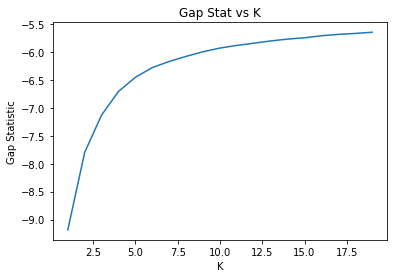

In [303]:
score_g, cluster_df = optimalK(batting2_dum.drop(['playerID', 'salary'],axis=1), nrefs=5, maxClusters=20)
plt.plot(cluster_df['clusterCount'], cluster_df['gap']);
plt.xlabel('K');
plt.ylabel('Gap Statistic');
plt.title('Gap Stat vs K');


In [304]:
batting2_dum.head()

,playerID,yearID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,salary,tm_group,AVG,OBP,SLG,teamID_ARI,...,teamID_COL,teamID_DET,teamID_FLO,teamID_HOU,teamID_KCA,teamID_LAA,teamID_LAN,teamID_MIA,teamID_MIL,teamID_MIN,teamID_NYA,teamID_NYN,teamID_OAK,teamID_PHI,teamID_PIT,teamID_SDN,teamID_SEA,teamID_SFN,teamID_SLN,teamID_TBA,teamID_TEX,teamID_TOR,teamID_WAS,lgID_AL,lgID_NL
0,abreubo01,2011,142,502.0,54.0,127.0,30.0,1.0,8.0,60.0,21.0,5.0,78.0,113.0,5.0,1.0,1.0,3.0,8.0,9000000,4,0.252988,0.410359,0.364542,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,aybarer01,2011,143,556.0,71.0,155.0,33.0,8.0,10.0,59.0,30.0,6.0,31.0,68.0,1.0,6.0,9.0,3.0,13.0,3000000,4,0.278777,0.345324,0.420863,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,bourjpe01,2011,147,502.0,72.0,136.0,26.0,11.0,12.0,43.0,22.0,9.0,32.0,124.0,0.0,10.0,7.0,1.0,7.0,414000,4,0.270916,0.354582,0.438247,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,callaal01,2011,141,475.0,54.0,137.0,23.0,0.0,6.0,46.0,8.0,1.0,58.0,48.0,8.0,1.0,0.0,2.0,11.0,2000000,4,0.288421,0.412632,0.374737,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,congeha01,2011,59,177.0,14.0,37.0,8.0,0.0,6.0,19.0,0.0,0.0,17.0,37.0,2.0,1.0,2.0,0.0,2.0,414000,4,0.209040,0.310734,0.355932,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


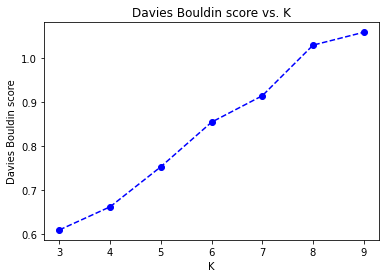

In [305]:
scores = []
centers = list(range(3,10))
for center in centers:
    scores.append(get_kmeans_score(batting2_dum.drop(['playerID', 'salary'],axis=1), center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');

In [306]:
kmeans = KMeans(n_clusters = 8)
kmeans.fit(batting2_dum.drop(['playerID', 'salary'], axis=1))
batting2_dum['playerGroup'] = kmeans.predict(batting2_dum.drop(['playerID', 'salary'], axis=1))

In [307]:
batting2_dum[['tm_group', 'playerGroup']]

,tm_group,playerGroup
0,4,4
1,4,2
2,4,4
3,4,4
4,4,6
...,...,...
2213,1,4
2214,1,1
2215,1,0
2216,1,7


In [308]:
X = batting2_dum.drop(['playerID', 'yearID', 'salary'], axis=1)
y = batting2_dum['salary']

In [309]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [310]:
# try linear regression
lr4 = LinearRegression()
lr4.fit(X_train, y_train)
print(metrics.r2_score(y_train, lr4.predict(X_train)))

0.2881021925473142


In [311]:
# improved it slightly
# test accuracy
lr4_preds = lr4.predict(X_test)
print(metrics.r2_score(y_test, lr4_preds))

0.28873585908734667


In [312]:
# no overfitting
select = SelectKBest(score_func=f_regression, k=45)
z = select.fit_transform(X,y)

In [313]:
# scale the X first
sc2=StandardScaler()
X_sc = sc2.fit_transform(X)

In [314]:
X_sc_train, X_sc_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.25)

In [315]:
lr4.fit(X_sc_train, y_train)
print(metrics.r2_score(y_train, lr4.predict(X_sc_train)))

0.29426986933895394


In [316]:
lr4_preds = lr4.predict(X_sc_test)
print(metrics.r2_score(y_test, lr4_preds))

0.23426053906270716


In [317]:
# improves the accuracy
# Look at the important coeffs
print(lr4.coef_)
coeffs = lr4.coef_
# drop the features with the lowest coeffs

[-4.02610755e+06  2.84579516e+06  3.46008847e+05  1.11084422e+06
 -2.28922268e+05 -2.66512125e+05  6.42960280e+05  8.29610155e+05
  1.87995485e+05 -6.70373201e+05  8.31884712e+05 -5.62596651e+05
  7.12740665e+05  2.26605937e+04  8.37689434e+04  3.98474084e+05
  4.57615745e+05  1.43046852e+19 -1.76188459e+05 -4.22687439e+05
 -7.08183687e+05  1.23048437e+19  1.23749696e+19  8.80772305e+18
  6.64017732e+18  8.68126604e+18  9.35284335e+18  9.69678910e+18
  1.07086115e+19  1.16514766e+19  6.16913779e+18  6.78776983e+18
  1.35124898e+19  1.31271763e+19  6.26654831e+18  7.28244656e+18
  1.22099668e+19  1.21631707e+19  8.61724930e+18  6.50291634e+18
  1.16514766e+19  1.34173365e+19  7.24168068e+18  1.48569436e+19
  1.23048437e+19  1.11125298e+19  7.11773854e+18  9.80832515e+18
  1.30288313e+19  6.36228579e+18  8.48757991e+18  1.01343151e+19
 -1.39734880e+15 -1.39734880e+15 -2.45052277e+05]


Feature: 0, Score: -4026107.54559
Feature: 1, Score: 2845795.15509
Feature: 2, Score: 346008.84689
Feature: 3, Score: 1110844.21679
Feature: 4, Score: -228922.26788
Feature: 5, Score: -266512.12470
Feature: 6, Score: 642960.27957
Feature: 7, Score: 829610.15523
Feature: 8, Score: 187995.48546
Feature: 9, Score: -670373.20125
Feature: 10, Score: 831884.71214
Feature: 11, Score: -562596.65107
Feature: 12, Score: 712740.66462
Feature: 13, Score: 22660.59369
Feature: 14, Score: 83768.94345
Feature: 15, Score: 398474.08394
Feature: 16, Score: 457615.74485
Feature: 17, Score: 14304685215667263488.00000
Feature: 18, Score: -176188.45898
Feature: 19, Score: -422687.43906
Feature: 20, Score: -708183.68692
Feature: 21, Score: 12304843702908246016.00000
Feature: 22, Score: 12374969625830813696.00000
Feature: 23, Score: 8807723053225372672.00000
Feature: 24, Score: 6640177320401336320.00000
Feature: 25, Score: 8681266036631992320.00000
Feature: 26, Score: 9352843347037700096.00000
Feature: 27, Sco

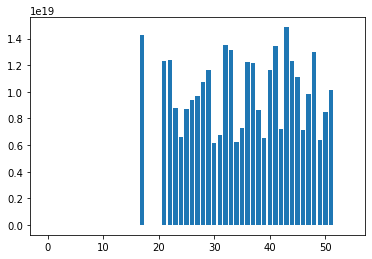

In [318]:
for i,v in enumerate(coeffs):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(coeffs))], coeffs)
plt.show()

In [319]:
# train on y_sqrt
lr5 = LinearRegression()
lr5.fit(X_sc_train, np.sqrt(y_train))

LinearRegression()

In [320]:
print(metrics.r2_score(np.sqrt(y_train), lr5.predict(X_sc_train)))

0.2956648594792939


In [321]:
sq_preds = lr5.predict(X_sc_test)
print(metrics.r2_score(np.sqrt(y_test), sq_preds))

0.23011454818165855


In [322]:
print(metrics.r2_score(y_test, sq_preds**2))

0.19363618522053816


In [323]:
from sklearn.tree import DecisionTreeRegressor

In [324]:
from sklearn.compose import TransformedTargetRegressor

In [325]:
from sklearn.preprocessing import QuantileTransformer

In [149]:
from sklearn.ensemble import RandomForestRegressor

In [328]:
rfModel = RandomForestRegressor()
#transforming target variable through quantile transformer
ttr = TransformedTargetRegressor(regressor=rfModel, transformer=QuantileTransformer(output_distribution='normal'))
ttr.fit(X_sc_train, y_train)
yhat = ttr.predict(X_sc_test)

In [329]:
print(metrics.r2_score(y_test, yhat))

0.13624719462266754


In [330]:
from sklearn.ensemble import GradientBoostingRegressor

In [331]:
gbr = GradientBoostingRegressor()

regr_trans = TransformedTargetRegressor(regressor=gbr, transformer=QuantileTransformer(output_distribution='normal'))
regr_trans.fit(X_sc_train, y_train)
yhat = regr_trans.predict(X_sc_test)
print(metrics.r2_score(y_test, yhat))


0.14110053035174352


In [332]:
gbr2 = GradientBoostingRegressor()
gbr2.fit(X_sc_train, y_train)
print(metrics.r2_score(y_test, gbr2.predict(X_sc_test)))

0.305670440838268


In [333]:
# This is much improved to the previous algorithms
gbr3 = GradientBoostingRegressor()
gbr3.fit(X_sc_train, np.sqrt(y_train))
print(metrics.r2_score(np.sqrt(y_test), gbr3.predict(X_sc_test)))

0.2853179756482518


In [334]:
gbrPreds = gbr3.predict(X_sc_test)
print(metrics.r2_score(y_test, gbrPreds**2))
print(metrics.r2_score(np.sqrt(y_test), gbrPreds))

0.2562511082759892
0.2853179756482518


In [335]:
from sklearn.model_selection import GridSearchCV

In [336]:
# Hypertune the gbr parameters
# Gradient Boost
tuned_parameters = [{'max_depth': [3,5,7,10,15], 'n_estimators': [50, 75, 100, 150, 200]}]
MSE_gr = ['mean_squared_error(y_test,y_pred6)']
for value in MSE_gr:
    grb_regr = GridSearchCV(GradientBoostingRegressor(), tuned_parameters,cv=4)
    grb_regr.fit(X_sc_train, y_train)
    y_true, y_pred6 = y_test, grb_regr.predict(X_sc_test)

print('The best hyper parameters for gradient boosting are: ', grb_regr.best_params_)

The best hyper parameters for gradient boosting are:  {'max_depth': 3, 'n_estimators': 75}


In [341]:
tuned_params = [{'max_depth': [3], 'n_estimators': [75], 'min_samples_leaf': [15, 25, 35, 50]}]
MSE_gr2 = ['mean_squared_error(y_test,y_pred7)']
for value in MSE_gr:
    grb_regr2 = GridSearchCV(GradientBoostingRegressor(), tuned_params,cv=4)
    grb_regr2.fit(X_sc_train, y_train)
    y_true, y_pred7 = y_test, grb_regr.predict(X_sc_test)

print('The best hyper parameters for gradient boosting are: ', grb_regr2.best_params_)

The best hyper parameters for gradient boosting are:  {'max_depth': 3, 'min_samples_leaf': 50, 'n_estimators': 75}


In [337]:
param_grid = {'n_estimators': [90, 75, 60, 50],  
              'max_depth': [3, 4, 5, 6],
              'learning_rate': [.001, .01, .1]
             }
                
grid = GridSearchCV(GradientBoostingRegressor(), param_grid, refit = True, verbose = 3, n_jobs=-1) #

# fitting the model for grid search 
regr_trans = TransformedTargetRegressor(regressor=grid, transformer=QuantileTransformer(output_distribution='normal'))
grid_result=regr_trans.fit(X_sc_train, y_train)
best_params=grid_result.regressor_.best_params_
print(best_params)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 75}


In [168]:

#using best params to create and fit model
best_model = GradientBoostingRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], learning_rate=best_params["learning_rate"])
regr_trans = TransformedTargetRegressor(regressor=best_model, transformer=QuantileTransformer(output_distribution='normal'))
regr_trans.fit(X_sc_train, y_train)
yhat = regr_trans.predict(X_sc_test)

In [338]:
gbr3 = GradientBoostingRegressor(max_depth = 3, n_estimators=75, learning_rate=0.1)
gbr3.fit(X_sc_train, y_train)
gbr3_preds = gbr3.predict(X_sc_test)
print(metrics.r2_score(y_test, gbr3_preds))

0.29206760010010424


In [346]:
# Up to 0.28
# try with transformed y
gbr4 = GradientBoostingRegressor(max_depth=5, n_estimators=60, learning_rate=0.1, min_samples_leaf=50)
gbr4.fit(X_sc_train, np.sqrt(y_train))
gbr4_preds = gbr4.predict(X_sc_test)
print(metrics.r2_score(np.sqrt(y_test), gbr4_preds))

0.30007051819491914


In [347]:
print(metrics.r2_score(np.sqrt(y_train), gbr4.predict(X_sc_train)))

0.5125801874028804
